In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [2]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('UCEC.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_UCEC(np_data)
num_groups = 5

**Vital status**

In [3]:
y = vital_status
iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

In class model:
Average train final cost: nan
Average train accuracy: 33.82 %
Average train F1 score: 0.40
Average test accuracy: 34.38 %
Average test F1 score: 0.38

Scikit model:
Average train final cost: 8.52
Average train accuracy: 75.34 %
Average train F1 score: 0.76
Average test final cost: 10.28
Average test accuracy: 70.24 %
Average test F1 score: 0.72

Highest average weights:
tumor_status : 8.86
new_tumor_event_type : 2.42
histological_grade : 1.51


**Death days to**

In [4]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 4000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: 9252577.78

Scikit model:
Average train accuracy: 33.77 %
Average test accuracy: 26.95 %


**Outcome**

In class model:
Logistic regression:
Average train final cost: nan
Average train accuracy: 82.50 %
Average train F1 score: 0.82
Average test accuracy: 85.00 %
Average test F1 score: 0.85

One vs all:
Average train accuracy: 86.88 %
Average train F1 score: 0.87
Average test accuracy: 82.50 %
Average test F1 score: 0.82

Scikit model:
Average train accuracy: 88.75 %
Average train F1 score: 0.89
Average test accuracy: 80.00 %
Average test F1 score: 0.79

Highest average weights:
tumor_status : 7.21
histological_type : 2.16
new_tumor_event_type : 2.09


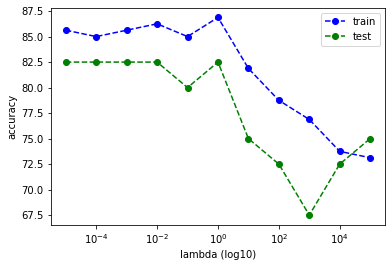

In [6]:
y = outcome
lambda_val = 1
interested_in = [0, 2]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)